In [5]:
import time
import numpy as np
import skvideo.io 
import skimage.io as io
import skimage.transform as trans
import os
from skimage.feature import match_template
import skimage.color
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pytesseract
import pandas as pd
from PIL import Image
import json
import re
import pyautogui

In [6]:
pyautogui.click(100, 100)

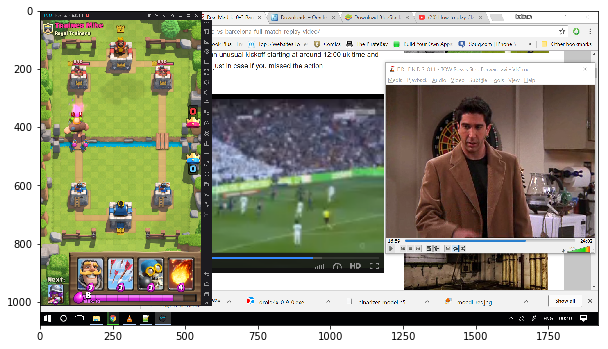

In [7]:
frame = plt.imread("screen.png")
plt.figure(figsize=(10,10))
plt.imshow(frame)

(982, 552, 4)


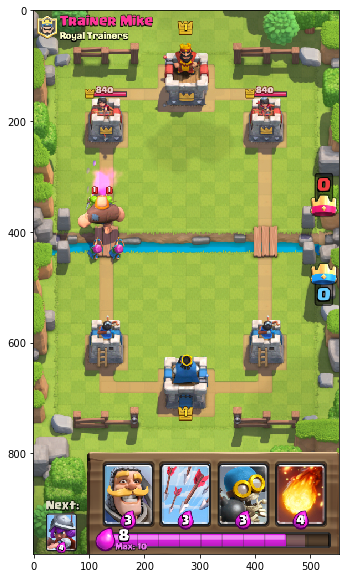

In [11]:
frame_crop=frame[30:1012,2:554]
plt.figure(figsize=(10,10))
plt.imshow(frame_crop)
print(np.shape(frame_crop))

(703, 418, 4)


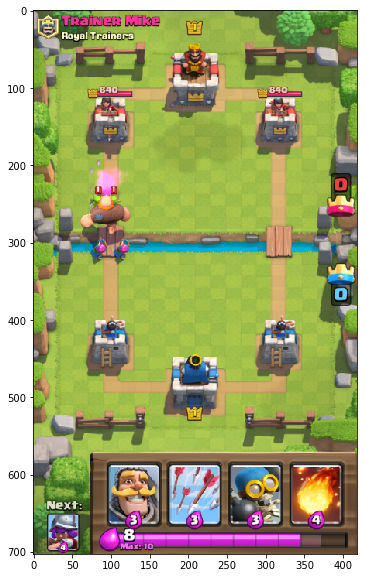

In [12]:
frame_crop=cv2.resize(frame_crop,(418,703))
plt.figure(figsize=(10,10))
plt.imshow(frame_crop)
print(np.shape(frame_crop))

In [41]:
deck_crop = frame[590:675,50:280]
h,w,_=np.shape(deck_crop)
print(h,w)

85 230


(115, 330, 4)


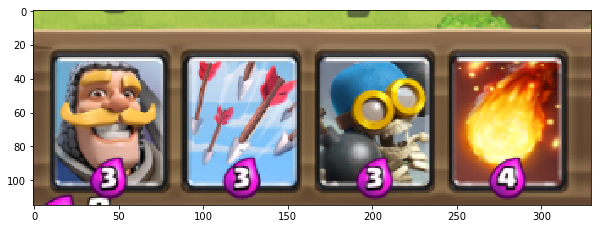

In [73]:
deck_crop=frame_crop[560:675,85:415]
plt.figure(figsize=(10,10))
plt.imshow(deck_crop)
print(np.shape(deck_crop))

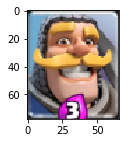

In [97]:
card=deck_crop[27:105,12:78]
plt.figure(figsize=(2,2))
plt.imshow(card)

In [99]:
print(np.shape(card))
adjustShape=np.shape(card)

(78, 66, 4)


In [100]:
cardsDir="ClashRoyalBot/Recorder/Data/cards/full/"
cardsList = [ file for file in os.listdir(cardsDir)]
print (len(cardsList))

77


In [102]:
deck=[]
cardNum=0
for card in cardsList:
    cardimg=io.imread(cardsDir+card)
    cardimg=cardimg[14:-14,14:-15,:]
    deck.append(cardimg)

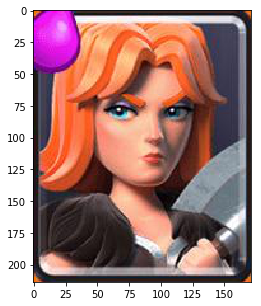

In [103]:
plt.figure(figsize=(5,5))
plt.imshow(deck[0])

In [105]:
eval_deck_templates=[]

for card in deck:
    card=cv2.resize(card,(adjustShape[1],adjustShape[0]))
    eval_deck_templates.append(card)

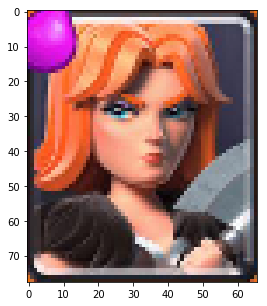

In [106]:
plt.figure(figsize=(5,5))
plt.imshow(eval_deck_templates[0])

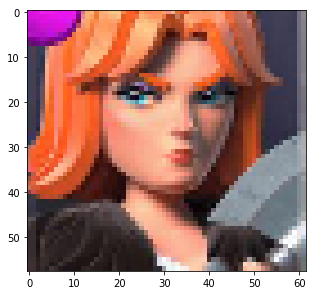

In [107]:
temp=eval_deck_templates[0]
temp=temp[10:-10,2:-2,:]

plt.figure(figsize=(5,10))
plt.imshow(temp)

In [108]:
def findCard(frame,template):
    template=template[10:-10,2:-2,:]
    template_gray = cv2.cvtColor(template.astype(np.float32), cv2.COLOR_RGB2GRAY)
    frame_gray = cv2.cvtColor(frame.astype(np.float32), cv2.COLOR_RGB2GRAY)
    res = cv2.matchTemplate(frame_gray,template_gray,cv2.TM_CCOEFF_NORMED)
    threshold = 0.7

    loc = np.where( res >= threshold)
    
    _,found=np.shape(loc)
    
    if found>0:
        return True
    else:
        return False

In [109]:
matches=[]
for cardInfo in eval_deck_templates:
    matches.append(findCard(deck_crop,cardInfo))
        
matches=np.array(matches)

In [110]:
print (matches)

[False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False False False False False False
 False False False False False]


In [111]:
np.save("program/eval_card_templates.npy",eval_deck_templates)

In [114]:
for i in range(len(matches)):
    print(i," ",matches[i])

0   False
1   False
2   True
3   True
4   False
5   False
6   False
7   False
8   False
9   False
10   False
11   False
12   False
13   False
14   False
15   False
16   False
17   False
18   False
19   False
20   False
21   False
22   False
23   False
24   False
25   False
26   False
27   False
28   False
29   False
30   False
31   False
32   False
33   False
34   False
35   False
36   False
37   False
38   False
39   False
40   False
41   False
42   False
43   False
44   False
45   False
46   False
47   False
48   False
49   False
50   False
51   False
52   False
53   False
54   False
55   False
56   True
57   False
58   False
59   False
60   True
61   False
62   False
63   False
64   False
65   False
66   False
67   False
68   False
69   False
70   False
71   False
72   False
73   False
74   False
75   False
76   False


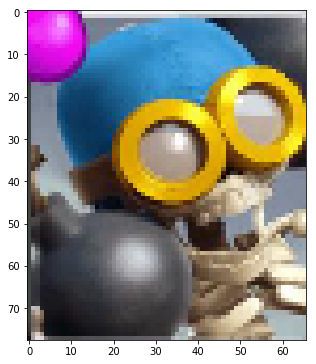

In [116]:
plt.figure(figsize=(5,10))
plt.imshow(eval_deck_templates[60])

(460, 330, 4)


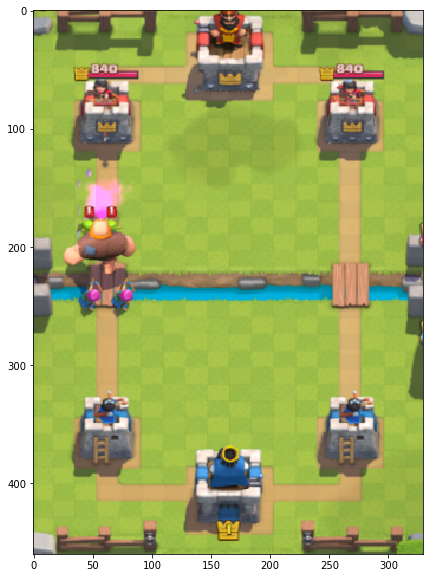

In [141]:
board_crop=frame_crop[50:-160,34:-36,:]
board_crop=cv2.resize(board_crop,(330,460))
plt.figure(figsize=(10,10))
plt.imshow(board_crop)
print(board_crop.shape)

In [144]:
matches[matches==1][0]

True

In [146]:
x=input("ok")

okok
